In [116]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib as plt
import matplotlib.pyplot as plotty
from sklearn import preprocessing

%matplotlib inline

In [125]:
# Load the datasets
def import_pricing():
    df = pd.read_csv('../data/raw/01_06_2014_until_04_06_2019.csv')
    return df

def import_lewisham():
    df = pd.read_pickle('../data/interim/lewisham.pkl')
    return df

def import_croydon():
    df = pd.read_pickle('../data/interim/croydon.pkl')
    return df

def import_westminster():
    df = pd.read_pickle('../data/interim/westminster.pkl')
    return df

def import_kensington_chelsea():
    df = pd.read_pickle('../data/interim/kensington_chelsea.pkl')
    return df

def import_lewisham_croydon():
    df = pd.read_pickle('../data/interim/lewisham_croydon.pkl')
    return df

def import_westminster_kensington_chelsea():
    df = pd.read_pickle('../data/interim/westminster_kensington_chelsea.pkl')
    return df

def lewisham_croydon_westminster_kensington_chelsea():
    df = pd.read_pickle('../data/interim/lewisham_croydon_westminster_kensington_chelsea.pkl')
    return df

In [126]:
districts = ['LEWISHAM', 
             'CITY OF WESTMINSTER',
             'CROYDON',
             'KENSINGTON AND CHELSEA']

In [223]:
df = import_croydon()

In [200]:
df = import_pricing()

# Preprocess

## Filtering subset

In [165]:
# Filter to Boroughs
lewisham = df[df['district'] == 'LEWISHAM']
croydon = df[df['district'] == 'CROYDON']
kensington_chelsea = df[df['district'] == 'KENSINGTON AND CHELSEA']
westminster = df[df['district'] == 'CITY OF WESTMINSTER']
# Output total length of combined filters
len(df[df['district'] == 'LEWISHAM']) + len(df[df['district'] == 'CROYDON']) + len(df[df['district'] == 'KENSINGTON AND CHELSEA']) + len(df[df['district'] == 'CITY OF WESTMINSTER'])

5496

In [111]:
# Combine Boroughs
lewisham_croydon = lewisham.append(croydon)
westminster_kensington_chelsea = kensington_chelsea.append(westminster)
lewisham_croydon_westminster_kensington_chelsea = lewisham_croydon.append(westminster_kensington_chelsea)

In [112]:
# Export the filtered data to pickles
lewisham.to_pickle('../data/interim/lewisham.pkl')
croydon.to_pickle('../data/interim/croydon.pkl')
kensington_chelsea.to_pickle('../data/interim/kensington_chelsea.pkl')
westminster.to_pickle('../data/interim/westminster.pkl')
lewisham_croydon.to_pickle('../data/interim/lewisham_croydon.pkl')
westminster_kensington_chelsea.to_pickle('../data/interim/westminster_kensington_chelsea.pkl')
lewisham_croydon_westminster_kensington_chelsea.to_pickle('../data/interim/lewisham_croydon_westminster_kensington_chelsea.pkl')
# Verify we pickled something
unpickled = pd.read_pickle('../data/interim/lewisham_croydon_westminster_kensington_chelsea.pkl')
unpickled

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url
12837,80E1AA98-B4B9-7BF8-E053-6C04A8C00BF2,434995,02/11/2018,E13 9FA,F,Y,L,FLAT 88,"LYALL HOUSE, 1",IRONWORKS WAY,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163024,5F54B81D-C4DD-2B45-E053-6B04A8C01FB0,371000,08/09/2017,SE10 8AD,F,N,L,FLAT E,86,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163025,2D1E4B26-E136-FCD1-E050-A8C0630544EC,350000,05/02/2016,SE10 8AD,F,N,L,FLAT H,86,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163026,1355CC56-DF93-455D-B15B-40A726D2122D,290000,13/07/2015,SE10 8AD,F,N,L,FLAT H,86,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163027,68FEB20C-0526-38DA-E053-6C04A8C051AE,620000,02/03/2018,SE10 8AD,F,N,L,NaN,90,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163028,3914047A-3E65-3206-E050-A8C063057647,592000,22/01/2016,SE10 8AD,F,N,L,NaN,90,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163029,31FB4C18-0BFC-57B9-E050-A8C063053436,387500,11/04/2016,SE10 8AF,F,N,L,1,HOWARD COURT,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163030,61D8894E-5E52-3DE6-E053-6C04A8C01207,415000,01/12/2017,SE10 8AF,F,N,L,3,HOWARD COURT,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163031,4E95D757-E07A-EDA1-E050-A8C0630539E2,450000,30/03/2017,SE10 8AF,F,N,L,4,HOWARD COURT,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
163032,34428D7E-8D5C-B86C-E050-A8C06205059C,440000,29/04/2016,SE10 8AF,F,N,L,6,HOWARD COURT,BLACKHEATH HILL,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


## Annotating features

In [77]:
# http://landregistry.data.gov.uk/app/ppd

# price_paid               int64 [233500, 270000, 176000, 450000, 440000]
# money, possibly look into normalizing
# deed_date               object ['05/07/2017', '05/07/2017', '05/07/2017', '05/07/2017', '05/07/2017']
# date object convert to timestamp and then add days since value
# property_type           object ['F', 'T', 'O', 'S', 'D']
# D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
# categorical data perform label encoder
# new_build               object ['N', 'Y']
# categorical data perform label encoder
# estate_type             object ['L', 'F']
# categorical data perform label encoder
# district                object ['TOWER HAMLETS', 'CITY OF LONDON', 'HACKNEY', 'HARROW', 'WALTHAM FOREST']
# categorical data perform label encoder
# transaction_category    object ['A', 'B']
# categorical data perform label encoder

## Dealing with missing Data

Each row is an observation of a house sale. Missing features in any observation may affect any prediction. As a prediction is a generalisation of characteristics of house price per borough, missing data will be treated as unobserved and thus removed.

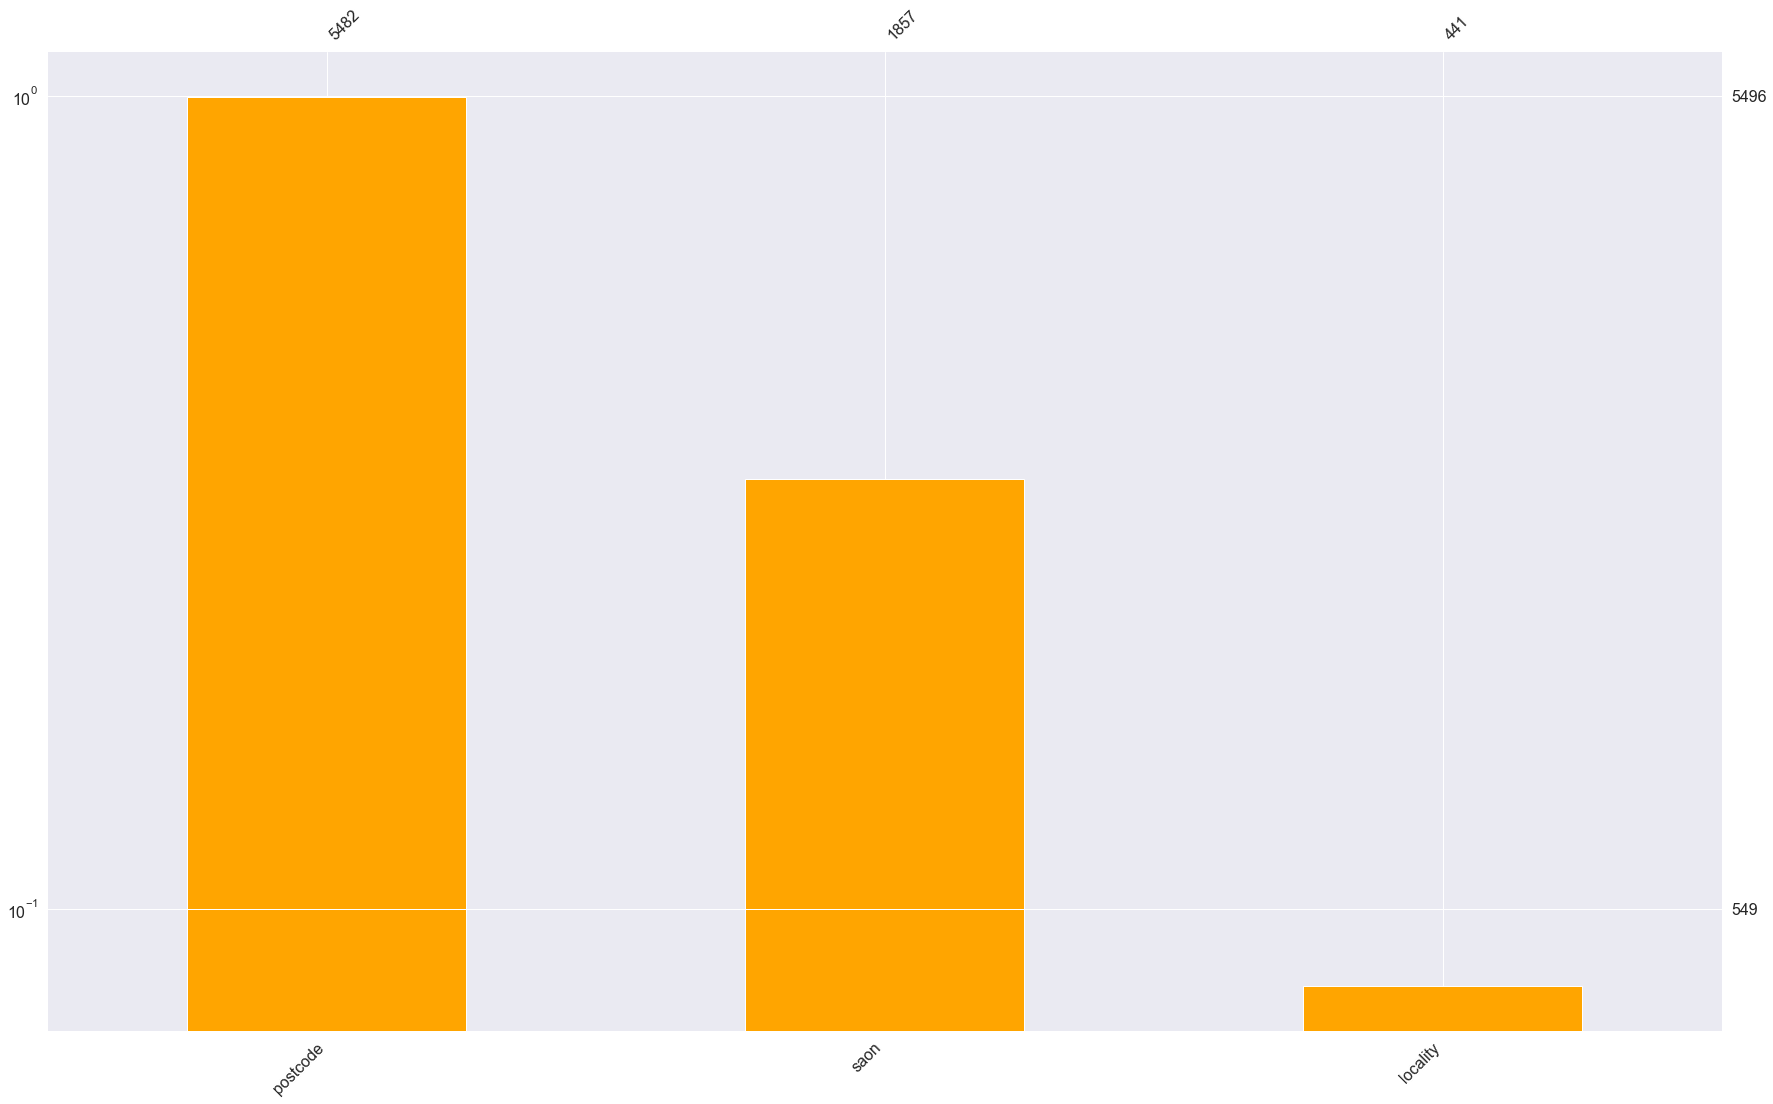

In [224]:
missingdata = df.columns[df.isnull().any()].tolist()
msno.bar(df[missingdata], color="orange", log=True, figsize=(30,18))

Given that these features are not required to predict house price per Borough we shall delete these columns.

In [225]:
df = df.drop(['unique_id', 'paon', 'saon', 'linked_data_url', 'street', 'locality', 'county', 'town','postcode'], axis=1)

## Dealing with Price Outliers

In [226]:
# Filter to values less than 1,000,000 or greater than 10,000
length_before = len(df)
df = df.loc[(df['price_paid'] < (1000000)) & (df['price_paid'] > (10000))]
length_after = len(df)
print({'before': length_before, 'after': length_after, 'difference': (length_before - length_after)})

{'before': 5496, 'after': 5393, 'difference': 103}


In [227]:
# logging values reduces the effect of outliers
df['price_log'] = [np.log(x) for x in df['price_paid']]
df[['price_paid', 'price_log']].head()

,price_paid,price_log
188715,301000,12.614866
188716,373500,12.830673
188717,353000,12.774223
188718,350000,12.765688
188719,362500,12.800780


## Encoding non numerical features

In [228]:
df['property_type_encoded'] = df[['property_type']].apply(preprocessing.LabelEncoder().fit_transform)
df['new_build_encoded'] = df[['new_build']].apply(preprocessing.LabelEncoder().fit_transform)
df['estate_type_encoded'] = df[['estate_type']].apply(preprocessing.LabelEncoder().fit_transform)
# df['district_encoded'] = df[['district']].apply(preprocessing.LabelEncoder().fit_transform)
df['transaction_category_encoded'] = df[['transaction_category']].apply(preprocessing.LabelEncoder().fit_transform)

## Dealing with Time

In [229]:
# Convert the date object type to... timestamp
df['time_stamp'] = pd.to_datetime(df['deed_date'])
# Create features for year and month
df['year'] = df['time_stamp'].dt.year
df['month'] = df['time_stamp'].dt.month
# create a lambda to give days since
days_since = lambda x: x - df.time_stamp.min()
# apply the lambda on time_stamp, writing to new column
df['days_since'] = df['time_stamp'].map(days_since)
# encode the 'days since' and write to new column
df['days_since_encoded'] = df['days_since'].dt.days
# Setting the index to timestamp for time series operations
df.index = df['time_stamp']
# Dropping unnecessary column
df.drop(['time_stamp'], axis=1)

,price_paid,deed_date,property_type,new_build,estate_type,district,transaction_category,price_log,property_type_encoded,new_build_encoded,estate_type_encoded,transaction_category_encoded,year,month,days_since,days_since_encoded
time_stamp,,,,,,,,,,,,,,,,
2017-01-25,301000,25/01/2017,O,N,F,CROYDON,B,12.614866,2,0,0,1,2017,1,1115 days,1115
2017-04-28,373500,28/04/2017,F,N,L,CROYDON,A,12.830673,1,0,1,0,2017,4,1208 days,1208
2015-02-10,353000,02/10/2015,F,N,L,CROYDON,A,12.774223,1,0,1,0,2015,2,400 days,400
2015-02-20,350000,20/02/2015,F,N,L,CROYDON,A,12.765688,1,0,1,0,2015,2,410 days,410
2014-05-09,362500,05/09/2014,F,N,L,CROYDON,A,12.800780,1,0,1,0,2014,5,123 days,123
2017-12-19,845000,19/12/2017,S,N,F,CROYDON,A,13.647092,3,0,0,0,2017,12,1443 days,1443
2017-06-12,302000,06/12/2017,F,N,L,CROYDON,B,12.618182,1,0,1,1,2017,6,1253 days,1253
2014-12-09,250000,12/09/2014,F,N,L,CROYDON,A,12.429216,1,0,1,0,2014,12,337 days,337
2014-12-06,282500,12/06/2014,F,N,L,CROYDON,A,12.551434,1,0,1,0,2014,12,334 days,334


In [231]:
croydon_processed = df
croydon_processed.to_pickle('../data/processed/croydon.pkl')
# Verify we pickled something
unpickled = pd.read_pickle('../data/processed/croydon.pkl')
unpickled

,price_paid,deed_date,property_type,new_build,estate_type,district,transaction_category,price_log,property_type_encoded,new_build_encoded,estate_type_encoded,transaction_category_encoded,time_stamp,year,month,days_since,days_since_encoded
time_stamp,,,,,,,,,,,,,,,,,
2017-01-25,301000,25/01/2017,O,N,F,CROYDON,B,12.614866,2,0,0,1,2017-01-25,2017,1,1115 days,1115
2017-04-28,373500,28/04/2017,F,N,L,CROYDON,A,12.830673,1,0,1,0,2017-04-28,2017,4,1208 days,1208
2015-02-10,353000,02/10/2015,F,N,L,CROYDON,A,12.774223,1,0,1,0,2015-02-10,2015,2,400 days,400
2015-02-20,350000,20/02/2015,F,N,L,CROYDON,A,12.765688,1,0,1,0,2015-02-20,2015,2,410 days,410
2014-05-09,362500,05/09/2014,F,N,L,CROYDON,A,12.800780,1,0,1,0,2014-05-09,2014,5,123 days,123
2017-12-19,845000,19/12/2017,S,N,F,CROYDON,A,13.647092,3,0,0,0,2017-12-19,2017,12,1443 days,1443
2017-06-12,302000,06/12/2017,F,N,L,CROYDON,B,12.618182,1,0,1,1,2017-06-12,2017,6,1253 days,1253
2014-12-09,250000,12/09/2014,F,N,L,CROYDON,A,12.429216,1,0,1,0,2014-12-09,2014,12,337 days,337
2014-12-06,282500,12/06/2014,F,N,L,CROYDON,A,12.551434,1,0,1,0,2014-12-06,2014,12,334 days,334


In [186]:
df = df['2019']

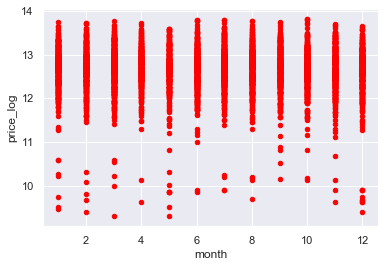

In [213]:
# a scatter plot
df.plot(kind='scatter',x='month',y='price_log',color='red')
plotty.show()

In [222]:
df
# df = df[df['district'] == 'LEWISHAM'] 
# df = df[['time_stamp', 'price_paid']]

,price_paid,price_log,property_type_encoded,new_build_encoded,estate_type_encoded,transaction_category_encoded,year,month,days_since_encoded
time_stamp,,,,,,,,,
2014-01-31,297997.916667,12.532541,2.083333,0.000000,0.583333,0.041667,2014.0,1.0,3.333333
2014-02-28,271930.000000,12.408085,2.133333,0.000000,0.666667,0.066667,2014.0,2.0,33.466667
2014-03-31,318261.578947,12.570181,2.368421,0.000000,0.526316,0.105263,2014.0,3.0,61.947368
2014-04-30,291141.458333,12.516690,2.375000,0.083333,0.500000,0.166667,2014.0,4.0,92.333333
2014-05-31,305908.676471,12.499676,2.235294,0.000000,0.529412,0.058824,2014.0,5.0,123.735294
2014-06-30,297384.200000,12.507018,2.168421,0.031579,0.557895,0.073684,2014.0,6.0,163.021053
2014-07-31,298312.494845,12.516261,2.319588,0.010309,0.453608,0.072165,2014.0,7.0,195.515464
2014-08-31,294443.437500,12.496875,1.862500,0.012500,0.637500,0.087500,2014.0,8.0,224.837500
2014-09-30,297953.216216,12.517174,1.918919,0.013514,0.567568,0.081081,2014.0,9.0,257.716216


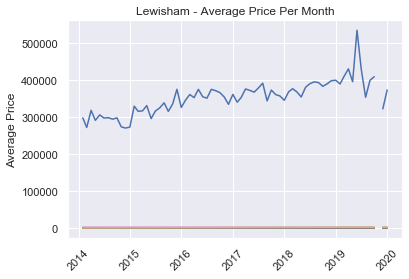

In [215]:
import seaborn as sns
sns.set()
df = df.resample('M').mean()
plotty.plot(df)
plotty.title('Lewisham - Average Price Per Month')
plotty.ylabel('Average Price')
plotty.xticks(rotation=45)
plotty.show()

In [27]:
# temp = df['2019']['price_paid'].mean()
# temp.plot(figsize=(16,5), title = 'Lewisham Housing Price(Monthwise)', fontsize = 12)

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [14]:
df = df['2019']
# df[(df['2019']) & (df['district'] == 'LEWISHAM')]
# df['2019' and df['district'] == 'TOWER HAMLETS']

In [16]:
df = df[df['district'] == 'LEWISHAM']

## Split into table per district

In [75]:
lewisham = df[df['district'] == 'LEWISHAM']
croydon = df[df['district'] == 'CROYDON']
kensington_and_chelsea = df[df['district'] == 'KENSINGTON AND CHELSEA']
city_of_westminster = df[df['district'] == 'CITY OF WESTMINSTER']

# Explore

In [83]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

# 5496 rows × 16 columns croydon
# 11440 rows × 16 columns kensington_and_chelsea
# 20389 rows × 16 columns lewisham

# Model Comparison

## Datasets
- [ ] Croydon 
- [ ] Lewisham
- [ ] Kensington and Chelsea
- [ ] City of Westminster
## Features
- [ ] price paid
- [ ] property type

In [219]:
df.dropna()

,price_paid,price_log,property_type_encoded,new_build_encoded,estate_type_encoded,transaction_category_encoded,year,month,days_since_encoded
time_stamp,,,,,,,,,
2014-01-31,297997.916667,12.532541,2.083333,0.000000,0.583333,0.041667,2014.0,1.0,3.333333
2014-02-28,271930.000000,12.408085,2.133333,0.000000,0.666667,0.066667,2014.0,2.0,33.466667
2014-03-31,318261.578947,12.570181,2.368421,0.000000,0.526316,0.105263,2014.0,3.0,61.947368
2014-04-30,291141.458333,12.516690,2.375000,0.083333,0.500000,0.166667,2014.0,4.0,92.333333
2014-05-31,305908.676471,12.499676,2.235294,0.000000,0.529412,0.058824,2014.0,5.0,123.735294
2014-06-30,297384.200000,12.507018,2.168421,0.031579,0.557895,0.073684,2014.0,6.0,163.021053
2014-07-31,298312.494845,12.516261,2.319588,0.010309,0.453608,0.072165,2014.0,7.0,195.515464
2014-08-31,294443.437500,12.496875,1.862500,0.012500,0.637500,0.087500,2014.0,8.0,224.837500
2014-09-30,297953.216216,12.517174,1.918919,0.013514,0.567568,0.081081,2014.0,9.0,257.716216


In [ ]:
# Select features to model

In [220]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split 


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.gaussian_process import GaussianProcessRegressor

In [221]:
# load dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# prepare configuration
# df = import_croydon()
# # load dataset
# df = pd.read_pickle('../data/processed/numeric_only.pkl')
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# Split 80/20
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split data into predictors X and output Y
y = df['price_log']
X = df['property_type_encoded']

predictors = ['property_type_encoded']

# predictors = ['property_type_encoded', 'new_build', 'estate_type', 'district',
#        'transaction_category', 'numcode_days_since']
X = df[predictors]
Y = df['price_log']
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
# models.append(('LogR', LogisticRegression()))
models.append(('RFR', RandomForestRegressor()))
models.append(('LR', LinearRegression()))
# models.append(('DTR', DecisionTreeRegressor))
# models.append(('MLPR', MLPRegressor()))
# models.append(('RFR', ARDRegression()))
# models.append(('BR', BayesianRidge()))
# models.append(('EN', ElasticNet()))
# models.append(('HR', HuberRegressor()))
# models.append(('L', Lars()))
# models.append(('GPR', GaussianProcessRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/Users/david.maceachern/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/david.maceachern/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').